In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Data latih
X_train = [
    [178, 65],
    [155, 50],
    [180, 80],
    [168, 55],
    [175, 70],
    [165, 58],
    [168, 63],
    [172, 68],
    [178, 75],
    [162, 52],
    [169, 67],
    [163, 54],
    [176, 72],
    [181, 78],
    [166, 60]
]

y_train = [
    "Laki-laki", "Perempuan", "Laki-laki", "Perempuan", "Laki-laki",
    "Perempuan", "Laki-laki", "Laki-laki", "Laki-laki", "Perempuan",
    "Laki-laki", "Perempuan", "Laki-laki", "Laki-laki", "Perempuan"
]

# Inisialisasi model Decision Tree
tree = DecisionTreeClassifier()

# Melatih model
tree.fit(X_train, y_train)

# Data tanpa label
unlabelled = [[175, 70]]  # Contoh data tanpa label

# Melakukan prediksi
hasil = tree.predict(unlabelled)
print("Hasil prediksi:", hasil[0])

Hasil prediksi: Laki-laki


In [ ]:
import pandas as pd
sensus = {
    'tinggi': [158, 178, 183, 191, 155, 163, 188, 158, 178],
    'berat' : [64, 86, 84, 88, 48, 59, 67, 54, 67],
    'jenis_kelamin' : [ 'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita','wanita']
}
sensus_df = pd.DataFrame(sensus)
sensus_df


,tinggi,berat,jenis_kelamin
0,158,64,pria
1,178,86,pria
2,183,84,pria
3,191,88,pria
4,155,48,wanita
5,163,59,wanita
6,188,67,wanita
7,158,54,wanita
8,178,67,wanita


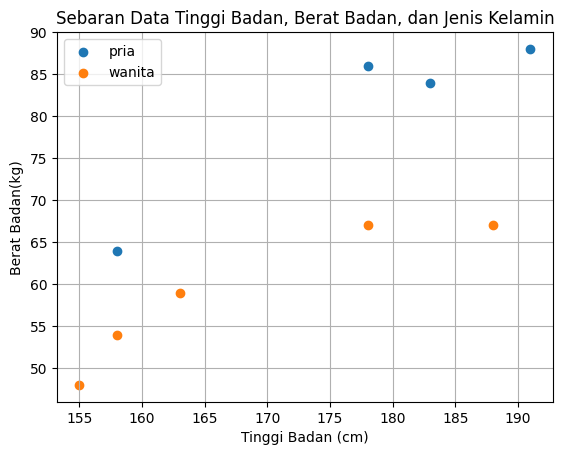

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jenis_kelamin, d in sensus_df.groupby('jenis_kelamin'):
 ax.scatter(d['tinggi'], d['berat'], label=jenis_kelamin)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan(kg)')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
x_train = np.array(sensus_df[['tinggi','berat']])
y_train = np.array(sensus_df['jenis_kelamin'])

print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')

x_train:
[[158  64]
 [178  86]
 [183  84]
 [191  88]
 [155  48]
 [163  59]
 [188  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [ ]:
y_train=y_train.flatten()
print(f'y_train:{y_train}')

y_train:[0 0 0 0 1 1 1 1 1]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
K=3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
tinggi_badan = 155
berat_badan = 70
x_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
x_new

array([[155,  70]])

In [ ]:
y_new = model.predict(x_new)
y_new

array([1])

In [ ]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

In [ ]:
target = np.array([tinggi_badan, berat_badan])
target

array([155,  70])

In [ ]:
x_train

array([[158,  64],
       [178,  86],
       [183,  84],
       [191,  88],
       [155,  48],
       [163,  59],
       [188,  67],
       [158,  54],
       [178,  67]])

In [ ]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(target, d) for d in x_train]
data_jarak

[6.708203932499369,
 28.0178514522438,
 31.304951684997057,
 40.24922359499622,
 22.0,
 13.601470508735444,
 33.13608305156178,
 16.278820596099706,
 23.194827009486403]

In [ ]:
sensus_df['jarak']=data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jenis_kelamin,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,48,wanita,22.000000
8,178,67,wanita,23.194827
1,178,86,pria,28.017851
2,183,84,pria,31.304952
6,188,67,wanita,33.136083
3,191,88,pria,40.249224
